In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def display(img,cmap='gray'):
    fig=plt.figure(figsize=(12,8))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

In [3]:
sep_coins=cv2.imread('DATA/pennies.jpg')

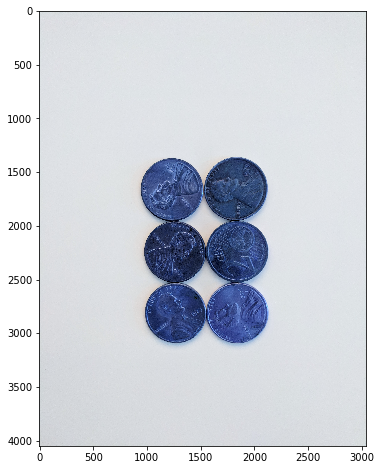

In [4]:
display(sep_coins,None)

In [5]:
blured_img=cv2.medianBlur(src=sep_coins,ksize=25)

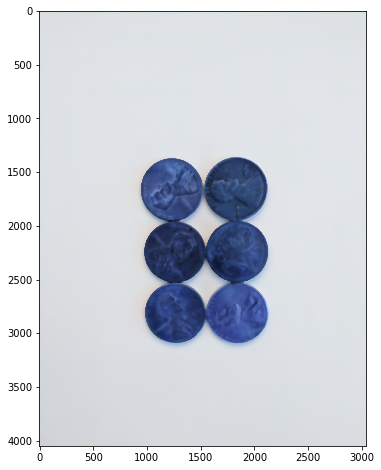

In [6]:
display(blured_img)

In [7]:
gray_sep_coins=cv2.cvtColor(blured_img,cv2.COLOR_BGR2GRAY)

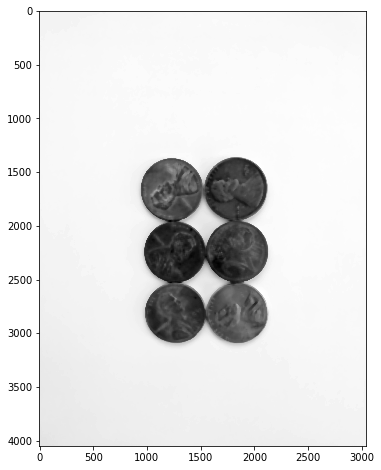

In [8]:
display(gray_sep_coins)

In [9]:
ret,thres=cv2.threshold(gray_sep_coins,thresh=160,maxval=255,type=cv2.THRESH_BINARY_INV)

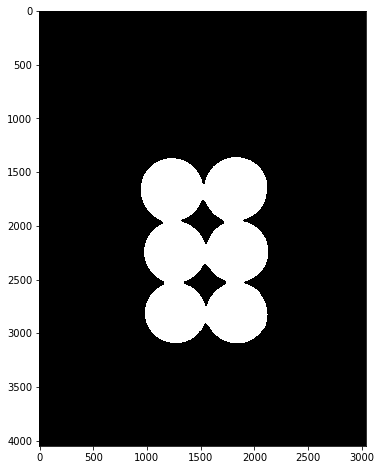

In [10]:
display(thres)

In [11]:
image,contours,hierarchy=cv2.findContours(image=thres.copy(),mode=cv2.RETR_CCOMP,method=cv2.CHAIN_APPROX_SIMPLE)

In [12]:
hierarchy

array([[[-1, -1,  1, -1],
        [ 2, -1, -1,  0],
        [-1,  1, -1,  0]]], dtype=int32)

In [13]:
for i in range(len(contours)):
    if hierarchy[0][i][3]==-1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),thickness=15)

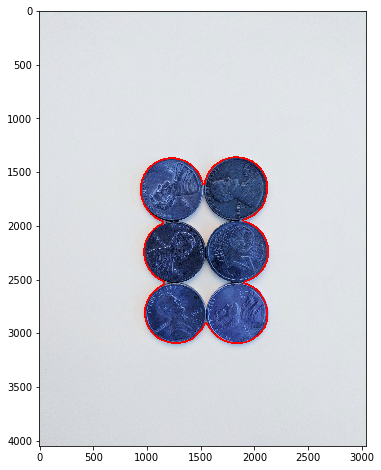

In [14]:
display(sep_coins)

## watershed 

In [15]:
#read image
#apply median blur
#Apply gray scale
#apply threshold

In [16]:
sep_coins=cv2.imread('DATA/pennies.jpg')

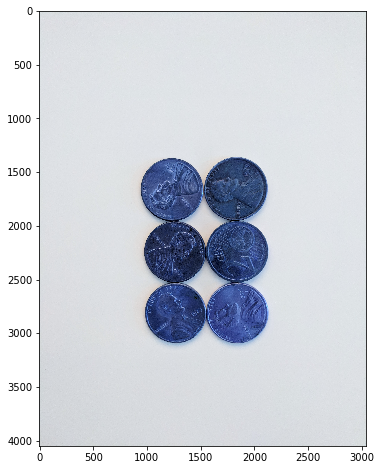

In [17]:
display(sep_coins)

In [18]:
#median blur
blur_coins=cv2.medianBlur(src=sep_coins,ksize=31)

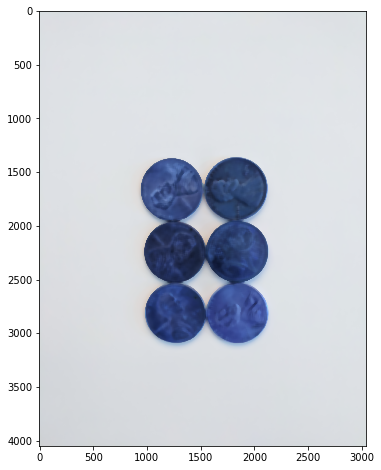

In [19]:
display(blur_coins)

In [20]:
#gray scale
gray_img=cv2.cvtColor(blur_coins,cv2.COLOR_BGR2GRAY)

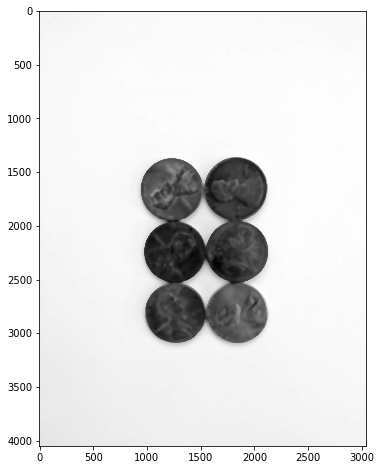

In [21]:
display(gray_img)

In [22]:
#threshold
ret,thres_img=cv2.threshold(src=gray_img,thresh=160,maxval=255,type=cv2.THRESH_BINARY_INV)

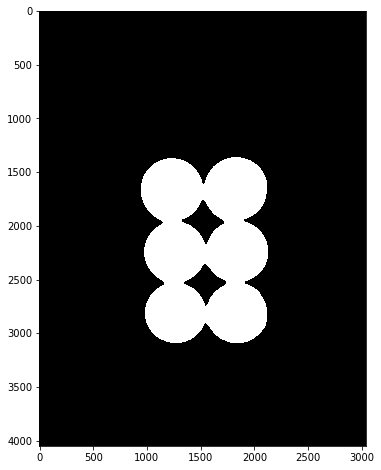

In [23]:
display(thres_img)

In [24]:
#but for watershed we have to use OTSU threshold
ret,thresh_ostu=cv2.threshold(src=gray_img,thresh=0,maxval=255,type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

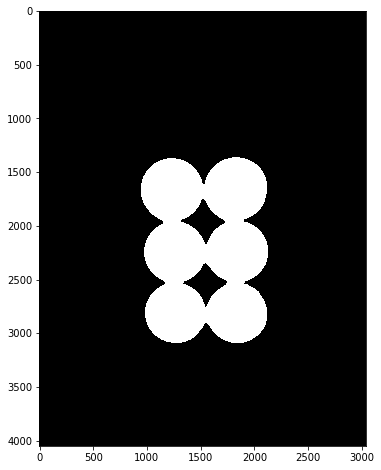

In [25]:
display(thresh_ostu)

In [26]:
# remove noise using 
kernel=np.ones((3,3),dtype=np.uint8)

In [27]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [28]:
img_open=cv2.morphologyEx(thresh_ostu,op=cv2.MORPH_OPEN,kernel=kernel,iterations=5)

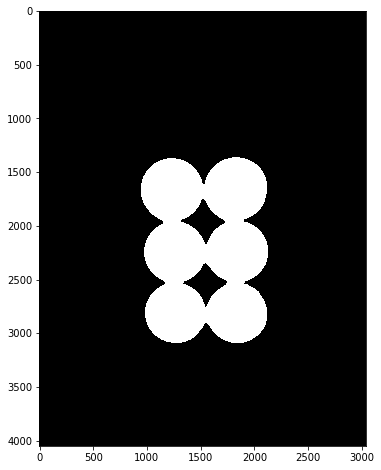

In [29]:
display(img_open)

In [30]:
#dilate
sure_bg=cv2.dilate(src=img_open,kernel=(5,5),iterations=5)

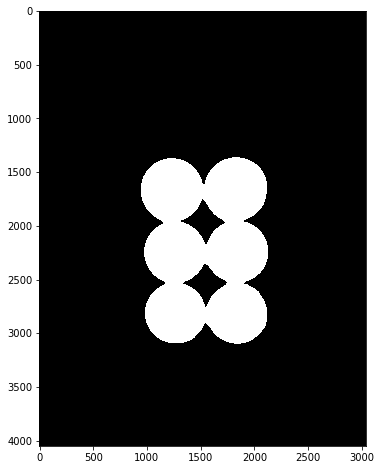

In [31]:
display(sure_bg)

In [32]:
transformed_img=cv2.distanceTransform(src=sure_bg,distanceType=cv2.DIST_L2,maskSize=5)

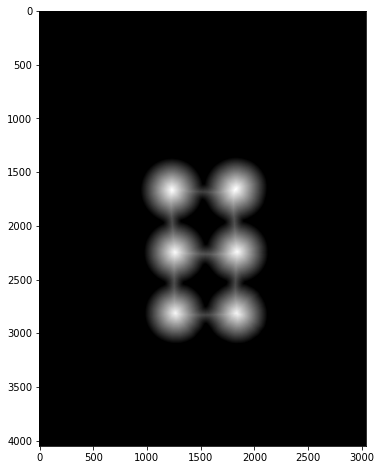

In [33]:
display(transformed_img)

In [34]:
ret,sure_fg=cv2.threshold(transformed_img,0.7*transformed_img.max(),255,type=0)

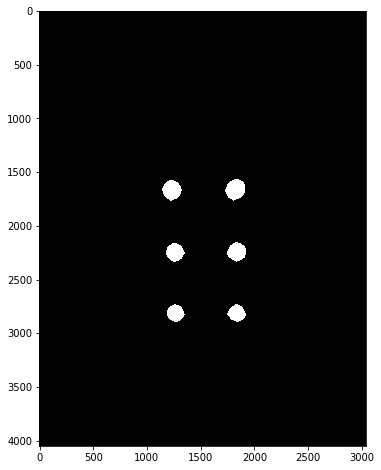

In [35]:
display(sure_fg)

In [36]:
sure_fg=np.uint8(sure_fg)

In [37]:
unknown=cv2.subtract(sure_bg,sure_fg)

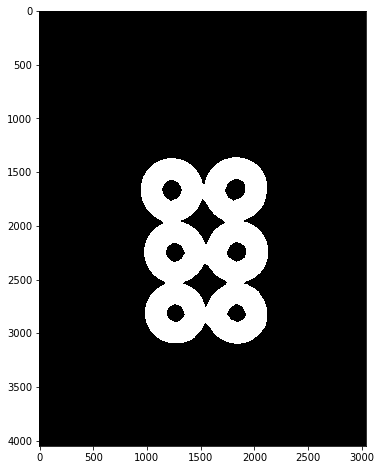

In [38]:
display(unknown)

In [39]:
ret,marker=cv2.connectedComponents(image=sure_fg)

In [40]:
marker

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [41]:
marker=marker+1

In [42]:
marker[unknown==255]=0

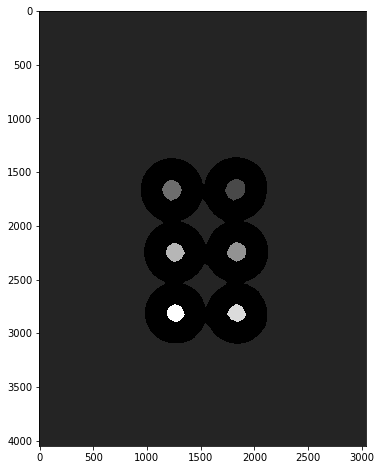

In [43]:
display(marker)

In [44]:
marker=cv2.watershed(sep_coins,marker)

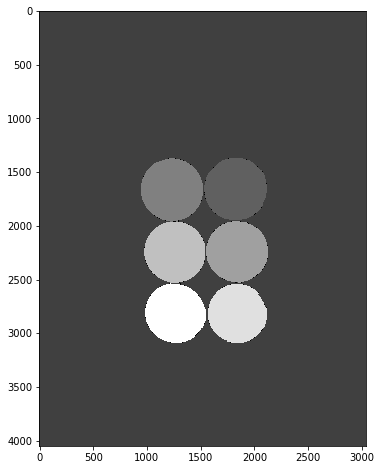

In [45]:
display(marker)

In [46]:
image,contours,hierarchy=cv2.findContours(image=marker.copy(),mode=cv2.RETR_CCOMP,method=cv2.CHAIN_APPROX_SIMPLE)

In [47]:
for i in range(len(contours)):
    if hierarchy[0][i][3]==-1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),thickness=15)

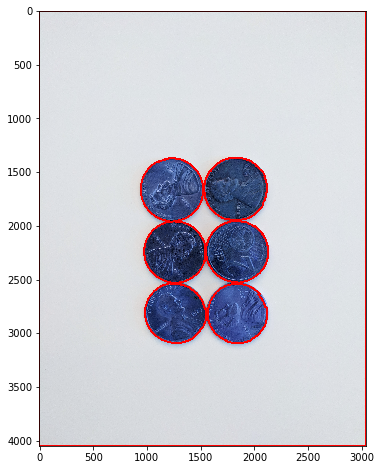

In [48]:
display(sep_coins)

## CUSTOM SEED WATER SHED

In [16]:
import cv2
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

In [17]:
road=cv2.imread('DATA/road_image.jpg')

In [18]:
road_copy=road.copy()

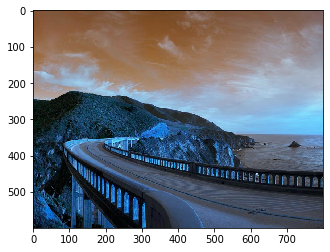

In [19]:
plt.imshow(road)

In [20]:
road.shape

(600, 800, 3)

In [21]:
#creating marker image
marker_image=np.zeros(road.shape[:2],dtype=np.int32) #black image of size 600,800

In [22]:
#creating segements
segments=np.zeros(road.shape,dtype=np.int32) #black image of size same as road image 600,800,3

In [23]:
#to create color using colormap cm based on index
def create_marker(i):
    return tuple(np.array(cm.tab10(i)[:3])*255)

In [24]:
colors=[]
for i in range(10):
    colors.append(create_marker(i))

In [25]:
##Global variables
marker_color_updated=False
current_marker_index=1
n_markers=10

In [26]:
#call back function
def mouse_button_clicked(events,x,y,flags,param):
    global marker_color_updated
    
    if events==cv2.EVENT_LBUTTONDOWN:
        cv2.circle(marker_image,(x,y),5,(current_marker_index),thickness=-1)
        cv2.circle(segments,(x,y),5,colors[current_marker_index],thickness=-1)
        marker_color_updated=True


In [28]:
cv2.namedWindow('Road image')
cv2.setMouseCallback('Road image',mouse_button_clicked)

while True:
    cv2.imshow('Road image',road_copy)
    cv2.imshow('Road image results',segments)
    k=cv2.waitKey(1)
    #to break 
    if k==27:
        break
    #to clear segmented image and road copy (to reset all)
    elif k==ord('c'): 
        marker_image=np.zeros(road.shape[:2],dtype=np.int32)
        segments=np.zeros(road.shape,dtype=np.int32)
        marker_color_updated=False
    #color marker update
    elif k>0 and chr(k).isdigit():
        current_marker_index=int(chr(k))
    if marker_color_updated:
        marker_image_copy=marker_image.copy()
        cv2.watershed(road_copy,marker_image_copy)
        #segments=np.zeros(road.shape,dtype=np.int32)
        for color_index in range(n_markers):
            segments[marker_image_copy==(color_index)]=colors[color_index]
        
        
cv2.destroyAllWindows()
    

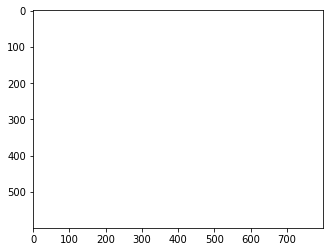